In [3]:
import pandas as pd
df = pd.read_csv("/Users/tiyanigurusinghe/Desktop/FDM Report/proj/Disease_Risk_Prediction_from_Daily_Habits/training/dataset/data.csv")   # adjust filename if different
print(df.shape)
df.head()

(100000, 48)


,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [2]:
df.columns

Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi',
       'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')

In [4]:
df_drop = ['survey_code','alcohol_consumption', 'bmi_scaled', 'bmi_scaled', 'bmi_corrected',  'bmi_estimated', 'gene_marker_flag', 'environmental_risk_score', 'electrolyte_level']
df_1 = df.drop(columns=df_drop, errors="ignore")
print(df_1.shape[1])
print(df_1.columns)

40
Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'smoking_level',
       'water_intake', 'screen_time', 'stress_level', 'mental_health_score',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'income', 'diet_type', 'exercise_type', 'device_usage',
       'healthcare_access', 'insurance', 'sunlight_exposure', 'meals_per_day',
       'caffeine_intake', 'family_history', 'pet_owner',
       'daily_supplement_dosage', 'target'],
      dtype='object')


In [5]:
# daily habits only
df_drop_2 = [ 'income','blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'daily_steps', 'calorie_intake', 'sugar_intake']
df_2 = df_1.drop(columns=df_drop_2, errors="ignore")
print(df_2.shape[1])
print(df_2.columns)

31
Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size', 'sleep_hours',
       'sleep_quality', 'work_hours', 'physical_activity', 'smoking_level',
       'water_intake', 'screen_time', 'stress_level', 'mental_health_score',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'device_usage', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake',
       'family_history', 'pet_owner', 'daily_supplement_dosage', 'target'],
      dtype='object')


In [6]:
# --- 2) Missingness + Duplicates
na = (
    df_2.isna()
      .sum()
      .to_frame("n_missing")
      .assign(pct=lambda x: (100 * x["n_missing"] / len(df_2)).round(2))
      .sort_values(["pct", "n_missing"], ascending=False)
)
print("Duplicates (full-row):", df_2.duplicated().sum())
print("\nTop-20 missingness:")
display(na.head(20))

Duplicates (full-row): 0

Top-20 missingness:


,n_missing,pct
caffeine_intake,33261,33.26
exercise_type,24969,24.97
age,0,0.00
gender,0,0.00
height,0,0.00
weight,0,0.00
bmi,0,0.00
waist_size,0,0.00
sleep_hours,0,0.00
sleep_quality,0,0.00


In [7]:
df_3 = df_2
# --- Handle caffeine intake ---
df_3["caffeine_intake"] = df_2["caffeine_intake"].fillna("Unknown")

# --- Handle exercise type ---
df_3["exercise_type"] = df_2["exercise_type"].fillna("Unknown")


print(df_3.shape)
print(df_3.columns)

(100000, 31)
Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size', 'sleep_hours',
       'sleep_quality', 'work_hours', 'physical_activity', 'smoking_level',
       'water_intake', 'screen_time', 'stress_level', 'mental_health_score',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'device_usage', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake',
       'family_history', 'pet_owner', 'daily_supplement_dosage', 'target'],
      dtype='object')


In [8]:
# --- 2) Missingness + Duplicates
na = (
    df_3.isna()
      .sum()
      .to_frame("n_missing")
      .assign(pct=lambda x: (100 * x["n_missing"] / len(df_3)).round(2))
      .sort_values(["pct", "n_missing"], ascending=False)
)
print("Duplicates (full-row):", df_3.duplicated().sum())
print("\nTop-10 missingness:")
display(na.head(10))

Duplicates (full-row): 0

Top-10 missingness:


,n_missing,pct
age,0,0.0
gender,0,0.0
height,0,0.0
weight,0,0.0
bmi,0,0.0
waist_size,0,0.0
sleep_hours,0,0.0
sleep_quality,0,0.0
work_hours,0,0.0
physical_activity,0,0.0


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_columns(df):
   
    label_encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object', 'category']).columns:
        unique_vals = df[col].nunique()

        if unique_vals == 2:
            # Label Encoding
            df[col] = label_encoder.fit_transform(df[col])
        elif unique_vals > 2:
            # One-Hot Encoding + bool'dan int'e dönüştürme
            dummies = pd.get_dummies(df[col], prefix=col).astype(int)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    return df

In [24]:
df_4 = encode_categorical_columns(df_3)
df_4.shape

(100000, 63)

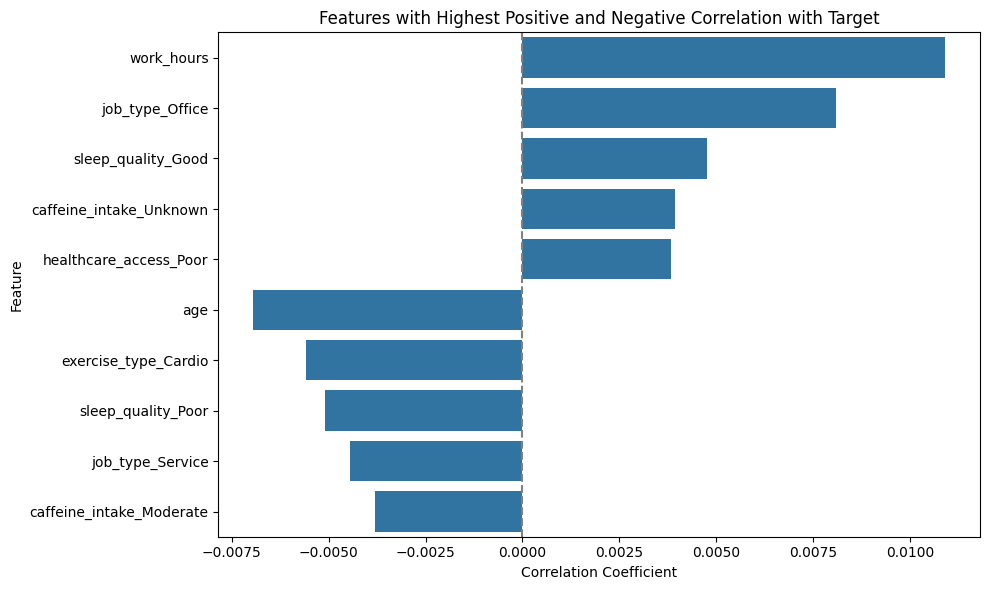

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_4.select_dtypes(include='number')

# Get the correlation matrix
corr_matrix = numeric_df.corr()

# Get correlation with target and drop itself
target_corr = corr_matrix['target'].drop('target')

# Select top 5 highest positive and top 5 highest negative correlations
top_5_positive = target_corr.sort_values(ascending=False).head(5)
top_5_negative = target_corr.sort_values().head(5)

# Combine them
top_corr_features = pd.concat([top_5_positive, top_5_negative])

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title("Features with Highest Positive and Negative Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')  # Zero line
plt.tight_layout()
plt.show()

In [18]:
df_4['target'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: target, Length: 100000, dtype: int64>

📊 Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.69885   0.698850  1.000000  0.822733
1        Random Forest   0.69825   0.698749  0.998855  0.822275
3             CatBoost   0.69800   0.698773  0.998140  0.822049
2              XGBoost   0.68990   0.699022  0.976891  0.814921


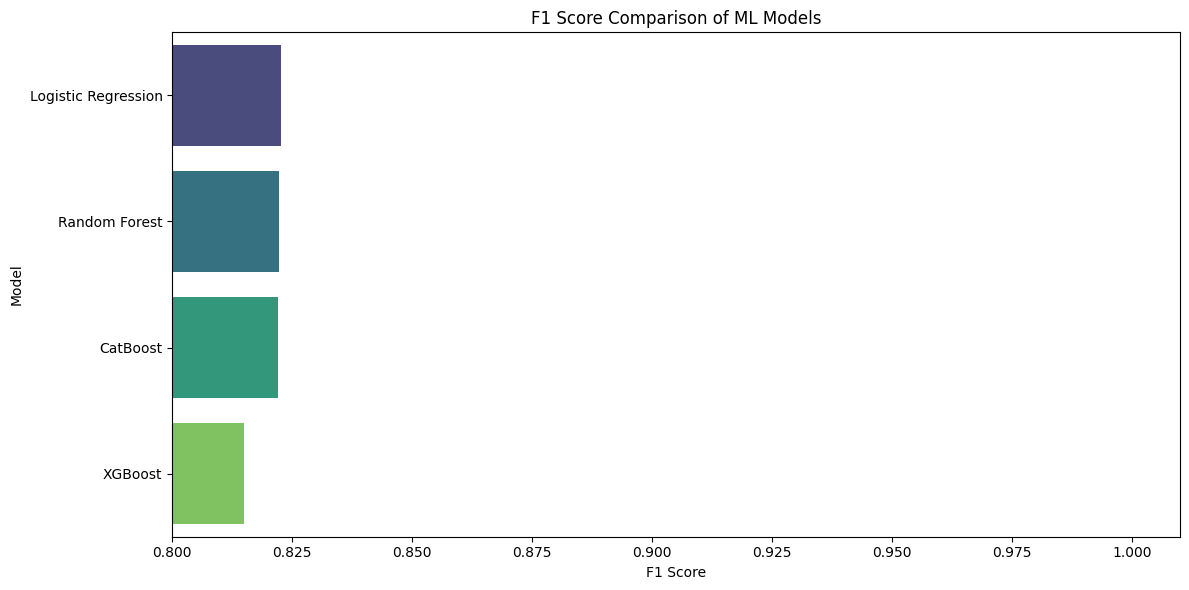

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Models we will use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

# --- 📌 1. Data Preparation ---

X = df_4.drop("target", axis=1)
y = df_4["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🚀 2. Define Models ---
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    # ("Gradient Boosting", GradientBoostingClassifier()),
    # ("Decision Tree", DecisionTreeClassifier()),
    # ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(probability=True)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    # ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0))
]

# --- 📊 3. Train and Evaluate Models ---
results = []

for name, model in models:
    pipe = Pipeline([
        ("scaler", StandardScaler()),  # Scale numerical features
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# 📋 Show results as a DataFrame
df_results = pd.DataFrame(results).sort_values("F1 Score", ascending=False)

# Print results
print("📊 Model Comparison Results:")
print(df_results)

# 📈 Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x="F1 Score", y="Model", data=df_results, palette="viridis")
plt.title("F1 Score Comparison of ML Models")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0.8, 1.01)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

# Hyperparameter grid
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto'],
    'model__degree': [2, 3]  # Only relevant when kernel = 'poly'
}

# GridSearchCV with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters
print("🔍 Best Parameters:", grid.best_params_)

# Test set evaluation
y_pred = grid.predict(X_test)
print("\n📊 Test Set Classification Results:\n")
print(classification_report(y_test, y_pred))